In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { line-height: 2; }</style>"))

/var/folders/6d/7kl6lflx0130f6swncnxzpjw0000gn/T/ipykernel_9240/203222255.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Preliminary analysis: descriptive statistics
Import the datafile _abalone_data.csv_ into a dataframe. Get familiar with the data and answoer the questions:
1. How many observations abalones are described? How many variables are there?  
<font  color=red size=5>Number of observatons : 4177</font>  
<font  color=red size=5>Number of variables : 9</font>
2. Are there any missing values in the dataset? If any, delete the observations with missing values.  
<font  color=red size=5>There are no missing values</font>  
3. Calculate descriptive statistics for all the variables(mean, max, quartiles, etc.). Interpret the output statistics. Are there any qualitative variables? If so, what are their categories? You can use graphics of your choice to help you describe the data(boxplots, scatter plots, histograms, etc.). Interpret the graphics.  
<font  color=red size=5>Yes, Sex is a qualitative variable</font>  

In [2]:
df = pd.read_csv('../data/raw/abalone_data.csv')
print(f'Number of observations: {df.shape[0]}')
print(f'Number of variables: {df.shape[1]}')

Number of observations: 4177
Number of variables: 9


In [3]:
print(df.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [4]:
desc_stats = df.describe()
print(desc_stats)

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

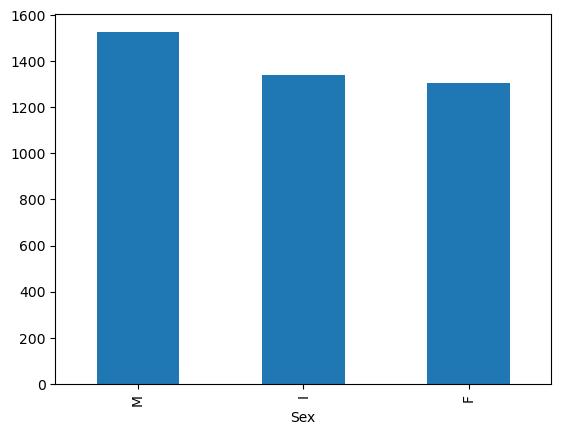

In [5]:
df['Sex'].value_counts().plot(kind='bar')
plt.show()

# Principal Component Analysis (PCA)
**<u>Theoretical question</u>**
1. If two variables are perfectly correlated in the dataset, would it be suitable to include both of them in the analysis when performing PCA ? Justify your answer. In contrast, what if the variables are completely uncorrelated ?  
<font  color=red size=5>Answer here</font>  

**<u>Practical application:</u>** You are going to perform PCA with the abalone dataset. In this section you are going to consider all the variables except the Sex.
1. Calculate the variance of each variable and interpret the results. Do you think it is necessary to standardize the variables before performing PCA for this dataset ? Why ?  
<font  color=red size=5>Answer here</font>  

2. Perform PCA using the appropriate function with the appropriate arguments and options considering your answer to the previous question. Analyze the output of the func- tion. Interpret the values of the two first principal component loading vectors.  
<font  color=red size=5>Answer here</font>  

3. Calculate the percentage of variance explained (PVE) by each component? Plot the PVE explained by each component, as well as the cumulative PVE. How many com- ponents would you keep ? Why ?  
<font  color=red size=5>Answer here</font>  

4. Use a biplot with a correlation circle to display both the principal component scores and the loading vectors in a single plot. Interpret the results.  
<font  color=red size=5>Answer here</font>  

In [6]:
df = pd.read_csv('../data/raw/abalone_data.csv')
variances = df.drop(columns=['Sex']).var()
print(variances)

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64


In [7]:
X = df.drop(columns=['Sex'])
## scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
pca = PCA()
principal_components = pca.fit_transform(X_scaled)
print(pca.components_)

[[ 4.16045412e-01  4.28039988e-01  8.28036838e-02  4.52852685e-01
   3.75815274e-01  3.66772024e-01  3.51214322e-01  1.80681049e-01]
 [ 8.65229261e-03  4.95425465e-02  3.19356059e-02 -1.28754329e-01
  -3.24991053e-01 -1.52288861e-01  1.24387539e-01  9.14105996e-01]
 [-5.61996714e-01 -5.65603770e-01 -2.78496423e-02  3.46583405e-01
   2.37008334e-01  2.87742287e-01  2.67223562e-01  1.81602322e-01]
 [-4.15146976e-02  4.28363842e-02  3.81654463e-02  3.55838163e-02
  -4.20842113e-01 -2.54634824e-01  8.13145347e-01 -3.00942572e-01]
 [-3.33180677e-02  2.42641851e-04 -2.62183560e-02  1.16227178e-01
   5.77243534e-01 -7.99948227e-01  7.21850859e-02  7.97228797e-02]
 [-2.77497622e-01  1.74321810e-01  9.40825809e-01 -4.09819958e-02
   3.21842344e-02 -1.02987602e-02 -6.23685530e-02 -2.72492849e-02]
 [ 6.56398377e-01 -6.79847964e-01  3.21341703e-01 -1.86824419e-02
  -3.45876202e-03 -3.91508290e-02  4.22244264e-02  3.27737368e-03]
 [-1.71383391e-02 -1.82171518e-03 -2.81134854e-02 -8.00889000e-01
   

[0.88693926 0.06146077 0.02733574 0.01028793 0.00844408 0.0023612
 0.00210364 0.00106738]
[0.88693926 0.94840003 0.97573577 0.9860237  0.99446778 0.99682897
 0.99893262 1.        ]


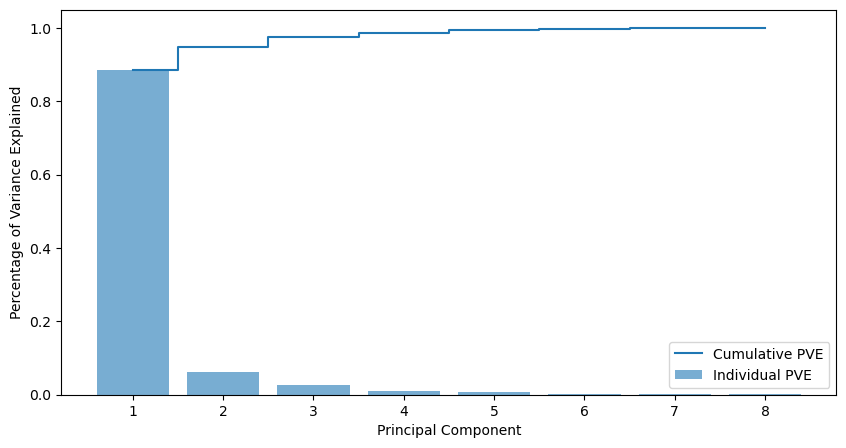

In [8]:
pve = pca.explained_variance_ratio_
cumulative_pve = pve.cumsum()
print(pve)
print(cumulative_pve)



plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pve) + 1), pve, alpha=0.6, label='Individual PVE')
plt.step(range(1, len(pve) + 1), cumulative_pve, where='mid', label='Cumulative PVE')
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.show()

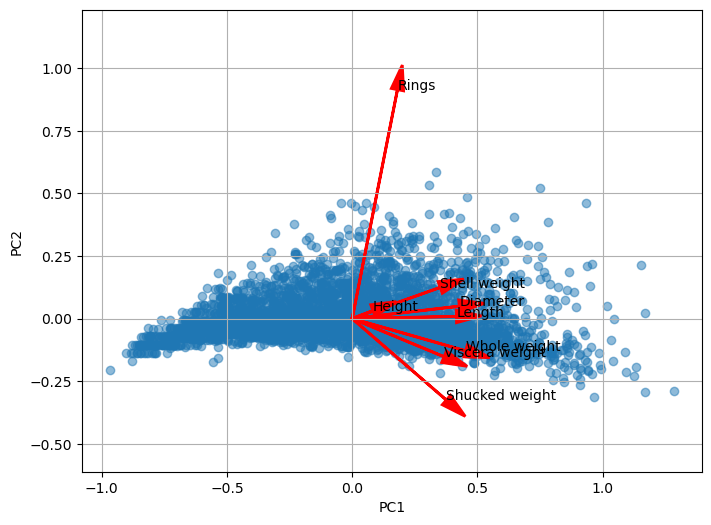

In [9]:

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color='red')
    plt.text(v[0], v[1], df.columns[i + 1], color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.axis('equal')
plt.show()

# Linear Regression
**<u>theoretical question:</u>** Let us suppose that we fit a linear regression model to explain $Y$ as a linear function of two variables $X_1$ and $X_1$. Let us denote $R^2$ the associated coefficient of determination. Interpret $R^2$ What is the range of values that can be taken by $R^2$? If we denote $r_1$ and $r_2$ the coefficient of correlatioin between $X_1$ and $Y$ and the coefficient of correlation between $X_2$ and $Y$ respecively. What is the relationship between $R^2$ and $r_1$ and $r_2$?
## Simple Linear regression
Calculate the correlation coefficient between Age and each of the other variables (except Sex ans Rings of course). Comment on the results. Which variable is the most correlated with the target Age ?  

Fit a simple linear regression model using as target variable Age, denoted $Y$ , and as feature variable the most correlated variable to it that you identified in the previous question, denoted $X$ :  
$$
Y = \beta_0 + \beta_1X + \epsilon
$$
Then, answer the following questions:
1. What are the coefficient estimates? Interpret coefficient estimate $\hat{\beta}_1$.  
<font  color=red size=5>Answer here</font>   
2. Give the general expression of a $1 - \alpha$ confidence interval for the parametrer $\beta_1$. Calculate the 95% confidence interval for this coefficient. Interpret the results.  
<font  color=red size=5>Answer here</font>   
3. Elaborate the zero slope hypothesis test for coefficient $\beta_1$ and conclude if there is an impact of the predictor on the **Age**. Is $\beta_1$ significantly non zero?  
<font  color=red size=5>Answer here</font>   
4. What is the value of the coefficient of determination $R^2$? Interpret this result. Is this model suitable to predict the **Age** of an abalone?

In [10]:
df = pd.read_csv('../data/processed/processed_abalone_data.csv')

In [11]:
correlations = df.drop(columns=['Age']).corrwith(df['Age'])
print(correlations)

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
dtype: float64


In [12]:
most_correlated_var = correlations.idxmax()
X = df[[most_correlated_var]]
y = df['Age']
model = LinearRegression().fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]
print(f'Intercept(beta_0): {beta_0}, Coefficient(beta_1): {beta_1}')

Intercept(beta_0): 7.983920159887557, Coefficient(beta_1): 14.58655012440063


In [13]:
import statsmodels.api as sm
X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2713.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        19:04:01   Log-Likelihood:                -9770.8
No. Observations:                4177   AIC:                         1.955e+04
Df Residuals:                    4175   BIC:                         1.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.9839      0.077    103.978      0.000       7.833       8.134
Shell weight    14.5866      0.280     52.084      0.000      14.037      15.136
==============================================================================
Omnibus:                     1213.646   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3601.423
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                       6.414   Cond. No.                         7.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression
Now you are going to fit multiple linear regression models in order to predict the target variable as a function of two or more predictors.  

In some practical situations it is suitable to select only a subset of the predictors instead of consi- dering all the available variables, since some variables can have no or just little statistical significance to predict the target. The _best subset selection_ method consists in fitting a separate least squares regression for each possible combination of the available feature. Perform the following tasks and answer the questions :
1. Use Best Subset Selection method to select the best model for any possible number of features ranging from 1 to 4. Plot the curve $\bar{R}^2$ versus the number of features. Then, select the best model. That is, the model for which the adjusted coefficient of determination $\bar{R}^2$ is the highest.  
<font  color=red size=5>Answer here</font>   
2. How many features did you keep? Which ones?  
<font  color=red size=5>Answer here</font>  
3. Why is it more appropriate to use the adjusted coefficient of determination $\bar{R}^2$ instead of the coefficient of determination $R^2$ when comparing two models with different numbers of predictors ?  
<font  color=red size=5>Answer here</font>  
4. For the selected model, what are the values of the coefficient estimates? Interpret them. What is the value of the coefficient of determination $R^2$? Interpret this value.  
<font  color=red size=5>Answer here</font>   
5. For the selected model, perform the zero slope hypothesis test for all the coefficients except $\beta_0$ and conclude. Perform the F-test and conlcude.  
<font  color=red size=5>Answer here</font> 

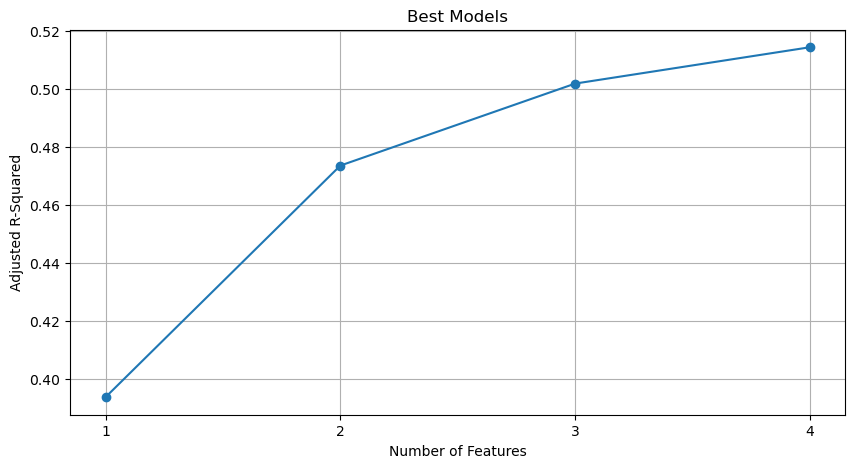

In [14]:
X = df.drop(columns=['Age'], axis=1)
y = df['Age']
results = []
def generate_combinations(X, current_index=0, current_combo=[]):
    if len(current_combo) > 0 and len(current_combo) <=4:
        X_combo = sm.add_constant(X[current_combo])
        model = sm.OLS(y, X_combo).fit()
        results.append((current_combo.copy(), model.rsquared_adj))
    if len(current_combo) == 4 or current_index == len(X.columns):
        return
    for i in range(current_index, len(X.columns)):
        current_combo.append(X.columns[i])
        generate_combinations(X, i+1, current_combo)
        current_combo.pop()
generate_combinations(X)
best_models = pd.DataFrame(results, columns=['Features', 'Adj_R2'])
best_models = best_models.groupby([len(c) for c in best_models['Features']]).apply(lambda x: x.nlargest(1, 'Adj_R2'))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), best_models['Adj_R2'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Adjusted R-Squared')
plt.title('Best Models')
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()

In [15]:

results_df = pd.DataFrame(results, columns=['Features', 'Adj_R2'])


results_df['Num_Features'] = results_df['Features'].apply(len)

best_models = results_df.groupby('Num_Features').apply(lambda x: x.nlargest(1, 'Adj_R2'))

for index, row in best_models.iterrows():
    print(f"Number of features: {row['Num_Features']}, Features: {row['Features']}, Adjusted R²: {row['Adj_R2']}")


Number of features: 1, Features: ['Shell weight'], Adjusted R²: 0.3937039955182152
Number of features: 2, Features: ['Shucked weight', 'Shell weight'], Adjusted R²: 0.4736712665147663
Number of features: 3, Features: ['Diameter', 'Shucked weight', 'Shell weight'], Adjusted R²: 0.5019831423976622
Number of features: 4, Features: ['Diameter', 'Whole weight', 'Shucked weight', 'Shell weight'], Adjusted R²: 0.5145295283409048


/var/folders/6d/7kl6lflx0130f6swncnxzpjw0000gn/T/ipykernel_9240/872319994.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_models = results_df.groupby('Num_Features').apply(lambda x: x.nlargest(1, 'Adj_R2'))


In [16]:
model_selected = sm.OLS(y, sm.add_constant(X[best_models.Features.values[-1]])).fit()
model_selected.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1107.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        19:04:01   Log-Likelihood:                -9305.1
No. Observations:                4177   AIC:                         1.862e+04
Df Residuals:                    4172   BIC:                         1.865e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6445      0.197     28.623      0.000       5.258       6.031
Diameter           7.8360      0.563     13.929      0.000       6.733       8.939
Whole weight      17.1043      1.639     10.433      0.000      13.890      20.318
Shucked weight   -28.0951      1.191    -23.595      0.000     -30.430     -25.761
Shell weight      12.2808      1.083     11.338      0.000      10.157      14.404
==============================================================================
Omnibus:                     1013.254   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2840.204
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                       6.140   Cond. No.                         78.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression with a qualitative variable(Bonus)
In this part you are going to include the variable **Sex** in your model.
1. How many observations are in each category of the variable **Sex**?  
<font  color=red size=5>Answer here</font>  
2. Plot a boxplot of the target variable **Age** versus the **Sex**. Comment on the output.  
<font  color=red size=5>Answer here</font>  
3. Perform multiple linear regression by adding the **Sex** as explanatory variable to the model selected in the previous section. Interpret the coefficient estimates of the variable **Sex** (for each category),perform the zero slope test and conclude.  
<font  color=red size=5>Answer here</font>  
4. For the fitted model make a prediction for an infant abalone with the following characteristics: **Length** = 0.4 mm, **Diameter** = 0.35 mm, **Height** = 0.12 mm, **Whole weight** = 0.40 g, **Shucked weight** = 0.15 g, **Viscera weight** = 0.8 g and **Shell weight** = 0.13 g  
<font  color=red size=5>Answer here</font> 

In [17]:
df_with_sex = pd.read_csv('../data/raw/abalone_data.csv')
df_with_sex = df_with_sex['Sex']
df['Sex'] = df_with_sex
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,16.5,M
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,8.5,M
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,10.5,F
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,11.5,M
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,8.5,I


In [18]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

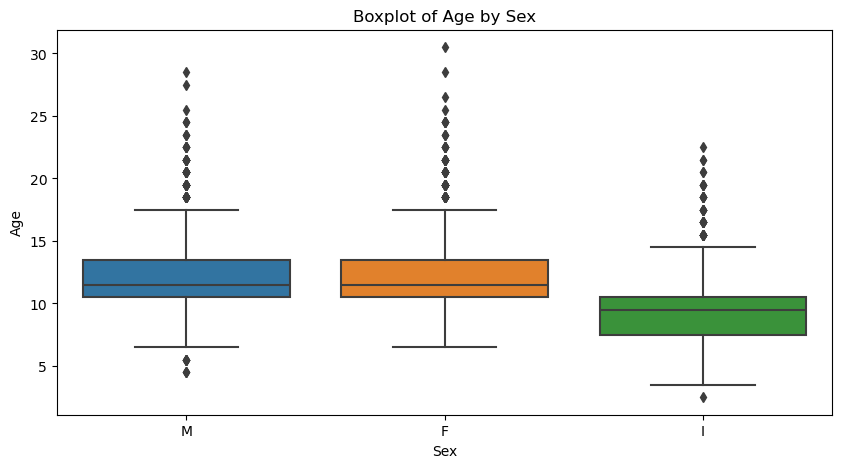

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sex', y='Age', data=df) ## 这里我后续可能要做特征工程删除离群值
plt.title('Boxplot of Age by Sex')
plt.show()

In [20]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)
df[['Sex_F', 'Sex_I', 'Sex_M']]=df[['Sex_F', 'Sex_I', 'Sex_M']].astype(int) ## turn the dummy variables into integers
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,16.5,0,0,1
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,8.5,0,0,1
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,10.5,1,0,0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,11.5,0,0,1
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,8.5,0,1,0


In [21]:
X = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']]
y = df['Age']
X = sm.add_constant(X)
model_with_sex = sm.OLS(y, X).fit()
print(model_with_sex.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        19:04:02   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.2897      0.170     25.

In [22]:
test_value = pd.DataFrame({
    'Length': [0.5],  ## why infant abalone have 0.5 length???
    'Diameter': [0.4], ## ??
    'Height': [0.1], 
    'Whole weight':[0.4], 
    'Shucked weight': [0.15], 
    'Viscera weight': [0.08], 
    'Shell weight':[0.13], 
    'Sex_F': [0], 
    'Sex_I': [1],
    'Sex_M': [0]})
## test_value = sm.add_constant(test_value) dosen't work
test_value['const'] = 1.0

cols = test_value.columns.tolist()
cols = [cols[-1]] + cols[:-1]
test_value = test_value[cols]
model_with_sex.predict(test_value)


0    15.053717
dtype: float64